# Megaline Revenue Showdown: Surf vs. Ultimate

### Overview: 
Megaline offers two prepaid plans—Surf and Ultimate. The commercial department is interested in understanding which of these plans generates more revenue in order to optimize advertising efforts and where to reallocate budgets.

### Objective:
The goal of this project is to analyze data from a sample of 500 Megaline clients to evaluate the usage patterns of customers on both the Surf and Ultimate plans, and to determine which plan generates more revenue. By doing so, we will provide actionable insights that could guide future marketing strategies and help in resource allocation for the company.

### Plan of Action: 
(1) Data Preparation

(2) Revenue Collection

(3) Comparitive Analysis

(4) Statistical Testing

(5) Data Visualization

(6) Findings

# Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mt
from math import factorial

# Load data

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')

## Prepare Data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans_df.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


### Summary:
Surf and Ultimate are the only two plans in the dataset. No missing values in dataset. Index 0-4 are correct int64 data types. Index 5-6 are correct float64 data types. Index 7 is correct object data type. usd_per_gb is calculated per gigabyte. mb_per_month_included is in megabytes. mb_per_month_included will have to be converted to gigabytes. 

## Enrich data

In [5]:
# added gb_per_month_included column
plans_df['gb_per_month_included'] = plans_df['mb_per_month_included'] / 1000
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.36
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.72


## Users

In [6]:
# Print the general/summary information about the users' DataFrame
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Print a sample of data for users
users_df.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
89,1089,Malena,Kelley,70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-09-03,surf,NaN
186,1186,Josiah,Douglas,55,"Las Vegas-Henderson-Paradise, NV MSA",2018-12-22,ultimate,2018-12-31
37,1037,Reena,Velazquez,20,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-11,ultimate,NaN
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN
456,1456,Seymour,Olsen,66,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-06-02,ultimate,NaN


### Summary:
Data types appear correct. Users_df contains missing values in churn_date. May be useful to check ages and plan values for inconsistencies. first_name, city, and last_name contain capital letters that could be an issue. reg_date and churn_date are not in datetime.

In [8]:
# Check age values
print('Age Min:', users_df['age'].min())
print('Age Max:', users_df['age'].max()) 

Age Min: 18
Age Max: 75


In [9]:
# check plan values
print(users_df['plan'].value_counts())

surf        339
ultimate    161
Name: plan, dtype: int64


In [10]:
# Check churn dates
churns = users_df[~users_df['churn_date'].isna()]
churns.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
466,1466,Alphonse,Harmon,56,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-26,surf,2018-09-17


### Summary:
Age contains values from 18 to 75 and plan only contains two values surf and ultimate. Churns shows 34 users that have stopped their service. Month_year column needs to be added for monthly calculations. 

### Fix Data

In [11]:
# Fix missing churn values
users_df['churn_date'] = users_df['churn_date'].fillna('unknown')

# lowercase first name, last name, and city
users_df['first_name'] = users_df['first_name'].str.lower()
users_df['last_name'] = users_df['last_name'].str.lower()
users_df['city'] = users_df['city'].str.lower()
users_df.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
423,1423,malcom,neal,61,"philadelphia-camden-wilmington, pa-nj-de-md msa",2018-10-16,surf,unknown


In [12]:
# to datetime (Keeping NaT values as unknown values)
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')
users_df.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
224,1224,kelly,cole,74,"atlanta-sandy springs-roswell, ga msa",2018-06-28,ultimate,NaT


In [13]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enrich Data

In [14]:
# to month_year
users_df['month_year'] = users_df['reg_date'].dt.to_period('m')
users_df['churn_month_year'] = users_df['churn_date'].dt.to_period('m')
users_df

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_year,churn_month_year
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,2018-12,NaT
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,2018-08,NaT
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,2018-10,NaT
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaT,2018-01,NaT
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,NaT,2018-05,NaT
...,...,...,...,...,...,...,...,...,...,...
495,1495,fidel,sharpe,67,"new york-newark-jersey city, ny-nj-pa msa",2018-09-04,surf,NaT,2018-09,NaT
496,1496,ariel,shepherd,49,"new orleans-metairie, la msa",2018-02-20,surf,NaT,2018-02,NaT
497,1497,donte,barrera,49,"los angeles-long beach-anaheim, ca msa",2018-12-10,ultimate,NaT,2018-12,NaT
498,1498,scot,williamson,51,"new york-newark-jersey city, ny-nj-pa msa",2018-02-04,surf,NaT,2018-02,NaT


In [15]:
# check for non missing churn_month_year
churns = users_df[~users_df['churn_date'].isna()]
churns.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_year,churn_month_year
67,1067,robt,allen,37,"grand rapids-kentwood, mi msa",2018-09-24,surf,2018-11-24,2018-09,2018-11


## Calls

In [16]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Print a sample of data for calls
calls_df.sample()

,id,user_id,call_date,duration
42091,1155_35,1155,2018-10-13,4.31


### Summary:
Call_date is object type but should be datetime. id is a unique call identifier that shouldn't be mixed up with user_id. Maintaining id as object type. No missing values. Month_year column needs to be added for monthly calculations. 

### Fix data

In [18]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

In [19]:
# rounded_minutes column
calls_df['rounded_minutes'] = np.ceil(calls_df['duration'])
calls_df.sample()

# month_year column
calls_df['month_year'] = calls_df['call_date'].dt.to_period('m')
calls_df.sample()


,id,user_id,call_date,duration,rounded_minutes,month_year
103744,1365_940,1365,2018-10-02,13.29,14.0,2018-10


## Messages

In [20]:
# Print the general/summary information about the messages' DataFrame
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# Print a sample of data for messages
messages_df.sample()

,id,user_id,message_date
2613,1028_536,1028,2018-11-28


### Summary:
message_date is object type but should be datetime. No missing values. Maintaining object type for id and int64 type for user_id. Month_year column needs to be added for monthly calculations. 

### Fix data

In [22]:
# to datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

In [23]:
# add month_year column
messages_df['month_year'] = messages_df['message_date'].dt.to_period('m')
messages_df.sample()

,id,user_id,message_date,month_year
43155,1283_94,1283,2018-12-20,2018-12


## Internet

In [24]:
# Print the general/summary information about the internet DataFrame
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Print a sample of data for the internet traffic
internet_df.sample()


,id,user_id,session_date,mb_used
91867,1425_279,1425,2018-11-13,621.76


### Summary:
session_date is object type but should be datetime. Maintaining object type for id and int64 for user_id. No missing values. Month_year column needs to be added for monthly calculations.  

### Fix data

In [26]:
# to datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

In [27]:
# add month_year column
internet_df['month_year'] = internet_df['session_date'].dt.to_period('m')
internet_df.sample()

,id,user_id,session_date,mb_used,month_year
77533,1362_206,1362,2018-07-09,0.0,2018-07


## Study plan conditions

In [28]:
# Print out the plan conditions and make sure they are clear for you

# Surf
# Monthly charge: $20
# 500 monthly minutes, 50 texts, and 15 GB of data
# After exceeding the package limits:
# 1 minute: 3 cents
# 1 text message: 3 cents
# 1 GB of data: $10

# Ultimate
# Monthly charge: $70
# 3000 monthly minutes, 1000 text messages, and 30 GB of data
# After exceeding the package limits:
# 1 minute: 1 cent
# 1 text message: 1 cent
# 1 GB of data: $7


# Aggregate data per user

In [29]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls_df.groupby(['user_id', 'month_year']).agg(calls_per_m=('id', 'count')).reset_index()
calls_per_month


,user_id,month_year,calls_per_m
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [30]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls_df.groupby(['user_id', 'month_year']).agg(minutes_per_m=('rounded_minutes', 'sum')).reset_index()
minutes_per_month


,user_id,month_year,minutes_per_m
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


In [31]:
# Group by and aggregate
result = calls_df.groupby(['user_id', 'month_year']).agg({'duration': ['count', 'sum']}).reset_index()

# Flatten the MultiIndex in columns
result.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in result.columns.values]
result

## Interesting THANK YOU

,user_id_,month_year_,duration_count,duration_sum
0,1000,2018-12,16,116.83
1,1001,2018-08,27,171.14
2,1001,2018-09,49,297.69
3,1001,2018-10,65,374.11
4,1001,2018-11,64,404.59
...,...,...,...,...
2253,1498,2018-12,39,324.77
2254,1499,2018-09,41,330.37
2255,1499,2018-10,53,363.28
2256,1499,2018-11,45,288.56


In [32]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_month = messages_df.groupby(['user_id', 'month_year']).agg(messages_per_m=('month_year', 'count')).reset_index()
messages_per_month


,user_id,month_year,messages_per_m
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [33]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
volume_per_month = internet_df.groupby(['user_id', 'month_year']).agg(mb_used_per_month=('mb_used', 'sum')).reset_index()
volume_per_month

# added gb used per month column and used ceil() for rounding up
volume_per_month['gb_used_per_month'] = np.ceil(volume_per_month['mb_used_per_month'] / 1000)
volume_per_month


,user_id,month_year,mb_used_per_month,gb_used_per_month
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,23.0
4,1001,2018-11,18504.30,19.0
...,...,...,...,...
2272,1498,2018-12,23137.69,24.0
2273,1499,2018-09,12984.76,13.0
2274,1499,2018-10,19492.43,20.0
2275,1499,2018-11,16813.83,17.0


In [34]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_data = pd.merge(calls_per_month, messages_per_month, on=['user_id', 'month_year'], how='outer')
merged_data = pd.merge(merged_data, volume_per_month, on=['user_id', 'month_year'], how='outer')
merged_data = pd.merge(merged_data, minutes_per_month, on=['user_id', 'month_year'], how='outer')
merged_data = pd.merge(merged_data, users_df[['user_id', 'plan']], on=['user_id'], how='outer')
merged_data = pd.merge(merged_data, users_df[['user_id', 'churn_month_year']], on=['user_id'], how='outer')
merged_data = pd.merge(merged_data, users_df[['user_id', 'city']], on=['user_id'], how='outer')
merged_data

,user_id,month_year,calls_per_m,messages_per_m,mb_used_per_month,gb_used_per_month,minutes_per_m,plan,churn_month_year,city
0,1000,2018-12,16.0,11.0,1901.47,2.0,124.0,ultimate,NaT,"atlanta-sandy springs-roswell, ga msa"
1,1001,2018-08,27.0,30.0,6919.15,7.0,182.0,surf,NaT,"seattle-tacoma-bellevue, wa msa"
2,1001,2018-09,49.0,44.0,13314.82,14.0,315.0,surf,NaT,"seattle-tacoma-bellevue, wa msa"
3,1001,2018-10,65.0,53.0,22330.49,23.0,393.0,surf,NaT,"seattle-tacoma-bellevue, wa msa"
4,1001,2018-11,64.0,36.0,18504.30,19.0,426.0,surf,NaT,"seattle-tacoma-bellevue, wa msa"
...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaT,NaN,NaN,NaN,NaN,NaN,surf,NaT,"boston-cambridge-newton, ma-nh msa"
2299,1319,NaT,NaN,NaN,NaN,NaN,NaN,surf,NaT,"colorado springs, co msa"
2300,1378,NaT,NaN,NaN,NaN,NaN,NaN,surf,NaT,"denver-aurora-lakewood, co msa"
2301,1463,NaT,NaN,NaN,NaN,NaN,NaN,ultimate,NaT,"atlanta-sandy springs-roswell, ga msa"


In [35]:
# check for monthyear missing values
check = merged_data[merged_data['month_year'].isna()]
check

,user_id,month_year,calls_per_m,messages_per_m,mb_used_per_month,gb_used_per_month,minutes_per_m,plan,churn_month_year,city
2293,1025,NaT,NaN,NaN,NaN,NaN,NaN,ultimate,NaT,"atlanta-sandy springs-roswell, ga msa"
2294,1129,NaT,NaN,NaN,NaN,NaN,NaN,surf,2018-12,"baton rouge, la msa"
2295,1143,NaT,NaN,NaN,NaN,NaN,NaN,surf,NaT,"cincinnati, oh-ky-in msa"
2296,1269,NaT,NaN,NaN,NaN,NaN,NaN,ultimate,2018-12,"dallas-fort worth-arlington, tx msa"
2297,1275,NaT,NaN,NaN,NaN,NaN,NaN,ultimate,NaT,"new york-newark-jersey city, ny-nj-pa msa"
2298,1307,NaT,NaN,NaN,NaN,NaN,NaN,surf,NaT,"boston-cambridge-newton, ma-nh msa"
2299,1319,NaT,NaN,NaN,NaN,NaN,NaN,surf,NaT,"colorado springs, co msa"
2300,1378,NaT,NaN,NaN,NaN,NaN,NaN,surf,NaT,"denver-aurora-lakewood, co msa"
2301,1463,NaT,NaN,NaN,NaN,NaN,NaN,ultimate,NaT,"atlanta-sandy springs-roswell, ga msa"
2302,1473,NaT,NaN,NaN,NaN,NaN,NaN,surf,NaT,"louisville/jefferson county, ky-in msa"


In [36]:
# rows contain no valuable data
# drop rows
merged_data = merged_data.dropna(subset=['month_year'])
merged_data

,user_id,month_year,calls_per_m,messages_per_m,mb_used_per_month,gb_used_per_month,minutes_per_m,plan,churn_month_year,city
0,1000,2018-12,16.0,11.0,1901.47,2.0,124.0,ultimate,NaT,"atlanta-sandy springs-roswell, ga msa"
1,1001,2018-08,27.0,30.0,6919.15,7.0,182.0,surf,NaT,"seattle-tacoma-bellevue, wa msa"
2,1001,2018-09,49.0,44.0,13314.82,14.0,315.0,surf,NaT,"seattle-tacoma-bellevue, wa msa"
3,1001,2018-10,65.0,53.0,22330.49,23.0,393.0,surf,NaT,"seattle-tacoma-bellevue, wa msa"
4,1001,2018-11,64.0,36.0,18504.30,19.0,426.0,surf,NaT,"seattle-tacoma-bellevue, wa msa"
...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,NaN,78.0,36730.05,37.0,NaN,ultimate,NaT,"chicago-naperville-elgin, il-in-wi msa"
2289,1349,2018-10,NaN,76.0,13093.55,14.0,NaN,surf,NaT,"boston-cambridge-newton, ma-nh msa"
2290,1349,2018-11,NaN,72.0,17128.26,18.0,NaN,surf,NaT,"boston-cambridge-newton, ma-nh msa"
2291,1349,2018-12,NaN,61.0,13039.91,14.0,NaN,surf,NaT,"boston-cambridge-newton, ma-nh msa"


In [37]:
# Check to see values in churn_month_year and check to see if users continue usage without a plan
check = merged_data[~merged_data['churn_month_year'].isna()]
check = merged_data[merged_data['month_year'] > merged_data['churn_month_year']]
check.sample()

,user_id,month_year,calls_per_m,messages_per_m,mb_used_per_month,gb_used_per_month,minutes_per_m,plan,churn_month_year,city
2117,1466,2018-12,32.0,41.0,11303.25,12.0,254.0,surf,2018-09,"los angeles-long beach-anaheim, ca msa"


In [38]:
# change plan name to "cancelled"
# filters out months where surf or ultimate are listed but plan was cancelled in futher analysis and plots
merged_data.loc[merged_data['month_year'] > merged_data['churn_month_year'], 'plan'] = 'cancelled'
check = merged_data[merged_data['plan'] == 'cancelled']
check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 54 to 2222
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   user_id            37 non-null     int64    
 1   month_year         37 non-null     period[M]
 2   calls_per_m        37 non-null     float64  
 3   messages_per_m     29 non-null     float64  
 4   mb_used_per_month  37 non-null     float64  
 5   gb_used_per_month  37 non-null     float64  
 6   minutes_per_m      37 non-null     float64  
 7   plan               37 non-null     object   
 8   churn_month_year   37 non-null     period[M]
 9   city               37 non-null     object   
dtypes: float64(5), int64(1), object(2), period[M](2)
memory usage: 3.2+ KB


/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [39]:
check.sample()

,user_id,month_year,calls_per_m,messages_per_m,mb_used_per_month,gb_used_per_month,minutes_per_m,plan,churn_month_year,city
1025,1220,2018-11,76.0,25.0,12919.69,13.0,487.0,cancelled,2018-10,"cincinnati, oh-ky-in msa"


In [40]:
# check length of DF
check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 54 to 2222
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   user_id            37 non-null     int64    
 1   month_year         37 non-null     period[M]
 2   calls_per_m        37 non-null     float64  
 3   messages_per_m     29 non-null     float64  
 4   mb_used_per_month  37 non-null     float64  
 5   gb_used_per_month  37 non-null     float64  
 6   minutes_per_m      37 non-null     float64  
 7   plan               37 non-null     object   
 8   churn_month_year   37 non-null     period[M]
 9   city               37 non-null     object   
dtypes: float64(5), int64(1), object(2), period[M](2)
memory usage: 3.2+ KB


In [41]:
# Add the plan information
def calculate_revenue(row):
    month_year = row['month_year']
    churn_month_year = row['churn_month_year']
    
    # Surf Plan
    if row['plan'] == 'surf':
        free_minutes = 500
        free_messages = 50
        free_gb = 15
        monthly_charge = 20
        minute_charge = 0.03
        message_charge = 0.03
        gb_charge = 10
        
    # Ultimate Plan
    elif row['plan'] == 'ultimate':
        free_minutes = 3000
        free_messages = 1000
        free_gb = 30
        monthly_charge = 70
        minute_charge = 0.01
        message_charge = 0.01
        gb_charge = 7
        
    # If user canceled plan but continued usage
    # used surf plan charges without free options
    elif row['plan'] == 'cancelled':
        free_minutes = 0
        free_messages = 0
        free_gb = 0
        monthly_charge = 0
        minute_charge = 0.03
        message_charge = 0.03
        gb_charge = 10
        
    # calculate excess usage
    excess_minutes = max(0, row['minutes_per_m'] - free_minutes)
    excess_messages = max(0, row['messages_per_m'] - free_messages)
    excess_gb = max(0, row['gb_used_per_month'] - free_gb)
    
    # calculate revenue from excess usage
    excess_charge = (excess_minutes * minute_charge) + (excess_messages * message_charge) + (excess_gb * gb_charge)
    
    # calculate total revenue
    total_revenue = monthly_charge + excess_charge
    return total_revenue


In [42]:
# Calculate the monthly revenue for each user
merged_data['monthly_revenue'] = merged_data.apply(calculate_revenue, axis=1)

# Display
merged_data[['user_id', 'month_year', 'plan', 'monthly_revenue']]

/tmp/ipykernel_141/4134699403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['monthly_revenue'] = merged_data.apply(calculate_revenue, axis=1)


,user_id,month_year,plan,monthly_revenue
0,1000,2018-12,ultimate,70.00
1,1001,2018-08,surf,20.00
2,1001,2018-09,surf,20.00
3,1001,2018-10,surf,100.09
4,1001,2018-11,surf,60.00
...,...,...,...,...
2288,1204,2018-12,ultimate,119.00
2289,1349,2018-10,surf,20.78
2290,1349,2018-11,surf,50.66
2291,1349,2018-12,surf,20.33


In [43]:
after_check = merged_data[(merged_data['plan'] == 'cancelled') & (merged_data['month_year'] == '2018-08')]
after_check

,user_id,month_year,calls_per_m,messages_per_m,mb_used_per_month,gb_used_per_month,minutes_per_m,plan,churn_month_year,city,monthly_revenue
1130,1246,2018-08,96.0,15.0,18177.28,19.0,698.0,cancelled,2018-07,"tampa-st. petersburg-clearwater, fl msa",211.39


In [44]:
# Check for monthly revenue when customer cancels plan and continues usage
check = merged_data[merged_data['month_year'] > merged_data['churn_month_year']]
check.sample(5)

,user_id,month_year,calls_per_m,messages_per_m,mb_used_per_month,gb_used_per_month,minutes_per_m,plan,churn_month_year,city,monthly_revenue
1913,1414,2018-12,65.0,54.0,30361.91,31.0,451.0,cancelled,2018-09,"urban honolulu, hi msa",325.15
81,1022,2018-11,72.0,NaN,22204.48,23.0,498.0,cancelled,2018-09,"new york-newark-jersey city, ny-nj-pa msa",244.94
82,1022,2018-12,82.0,NaN,18283.62,19.0,585.0,cancelled,2018-09,"new york-newark-jersey city, ny-nj-pa msa",207.55
2115,1466,2018-10,33.0,51.0,14944.62,15.0,238.0,cancelled,2018-09,"los angeles-long beach-anaheim, ca msa",158.67
213,1050,2018-11,57.0,NaN,14227.19,15.0,413.0,cancelled,2018-10,"miami-fort lauderdale-west palm beach, fl msa",162.39


In [45]:
# format merged data 
merged_data = merged_data.rename(columns={
    'mb_used_per_month': 'mb_used_per_m',
    'gb_used_per_month': 'gb_used_per_m'
})

merged_data = merged_data[[
    'user_id',
    'plan',
    'month_year',
    'churn_month_year',
    'monthly_revenue',
    'calls_per_m',
    'minutes_per_m',
    'messages_per_m',
    'mb_used_per_m',
    'gb_used_per_m',
    'city'
]]
merged_data.sample()

,user_id,plan,month_year,churn_month_year,monthly_revenue,calls_per_m,minutes_per_m,messages_per_m,mb_used_per_m,gb_used_per_m,city
1799,1393,surf,2018-12,NaT,31.64,126.0,888.0,32.0,14164.82,15.0,"knoxville, tn msa"


# Study user behaviour

## Calls

In [46]:
## info for missing values
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   user_id           2293 non-null   int64    
 1   plan              2293 non-null   object   
 2   month_year        2293 non-null   period[M]
 3   churn_month_year  158 non-null    period[M]
 4   monthly_revenue   2293 non-null   float64  
 5   calls_per_m       2258 non-null   float64  
 6   minutes_per_m     2258 non-null   float64  
 7   messages_per_m    1806 non-null   float64  
 8   mb_used_per_m     2277 non-null   float64  
 9   gb_used_per_m     2277 non-null   float64  
 10  city              2293 non-null   object   
dtypes: float64(6), int64(1), object(2), period[M](2)
memory usage: 215.0+ KB


In [47]:
## Replace missing values with 0
cols = ['calls_per_m', 'minutes_per_m', 'messages_per_m', 'mb_used_per_m', 'gb_used_per_m']
merged_data[cols] = merged_data[cols].fillna(0)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   user_id           2293 non-null   int64    
 1   plan              2293 non-null   object   
 2   month_year        2293 non-null   period[M]
 3   churn_month_year  158 non-null    period[M]
 4   monthly_revenue   2293 non-null   float64  
 5   calls_per_m       2293 non-null   float64  
 6   minutes_per_m     2293 non-null   float64  
 7   messages_per_m    2293 non-null   float64  
 8   mb_used_per_m     2293 non-null   float64  
 9   gb_used_per_m     2293 non-null   float64  
 10  city              2293 non-null   object   
dtypes: float64(6), int64(1), object(2), period[M](2)
memory usage: 215.0+ KB


In [48]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
avg_duration_month = merged_data.groupby(['plan', 'month_year'])['minutes_per_m'].mean().round(0).reset_index()
avg_duration_month

,plan,month_year,minutes_per_m
0,cancelled,2018-08,698.0
1,cancelled,2018-09,311.0
2,cancelled,2018-10,466.0
3,cancelled,2018-11,363.0
4,cancelled,2018-12,460.0
5,surf,2018-01,203.0
6,surf,2018-02,297.0
7,surf,2018-03,330.0
8,surf,2018-04,352.0
9,surf,2018-05,400.0


In [49]:
# Reformat df by month_year and plan totals
avg_duration_month_ultimate = avg_duration_month[avg_duration_month['plan'] == 'ultimate']
avg_duration_month_ultimate = avg_duration_month_ultimate.rename(columns={'minutes_per_m': 'ultimate_minutes_per_m'})

avg_duration_month_surf = avg_duration_month[avg_duration_month['plan'] == 'surf']
avg_duration_month_surf = avg_duration_month_surf.rename(columns={'minutes_per_m': 'surf_minutes_per_m'})


# merge
avg_duration_month = pd.merge(
    avg_duration_month_surf[['month_year', 'surf_minutes_per_m']],
    avg_duration_month_ultimate[['month_year', 'ultimate_minutes_per_m']],
    on='month_year', 
    how='outer'
)

avg_duration_month

,month_year,surf_minutes_per_m,ultimate_minutes_per_m
0,2018-01,203.0,194.0
1,2018-02,297.0,403.0
2,2018-03,330.0,304.0
3,2018-04,352.0,337.0
4,2018-05,400.0,406.0
5,2018-06,431.0,371.0
6,2018-07,450.0,427.0
7,2018-08,410.0,417.0
8,2018-09,414.0,441.0
9,2018-10,429.0,451.0


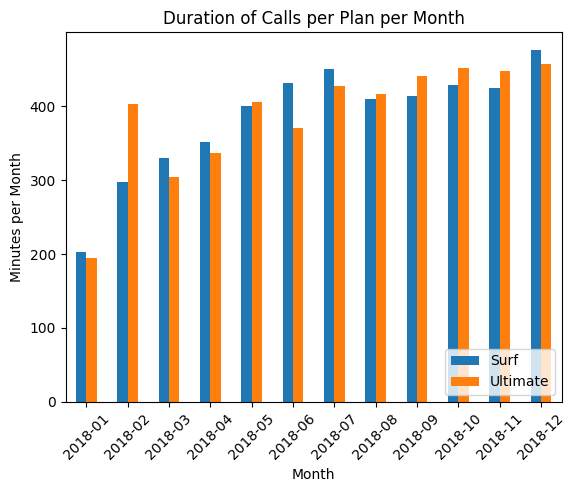

In [50]:
# Plot bar graph
avg_duration_month.plot(
    x='month_year',
    kind='bar',
    title='Duration of Calls per Plan per Month',
    xlabel='Month',
    ylabel='Minutes per Month'
)

plt.legend(['Surf', 'Ultimate'], loc='lower right')
plt.xticks(rotation=45)
plt.show()

### Summary:
This data indicates that the Surf plan experiences more fluctuation in monthly usage compared to the Ultimate plan, with overall higher usage in some months. Focusing on seasonality for Surf and consistency for Ultimate could help improve customer retention and maximize revenue.

In [51]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# Plot bar graph
avg_minutes_user = merged_data.groupby(['user_id', 'plan', 'month_year'])['minutes_per_m'].sum().reset_index()
avg_minutes_user.max()

user_id              1499
plan             ultimate
month_year        2018-12
minutes_per_m      1510.0
dtype: object

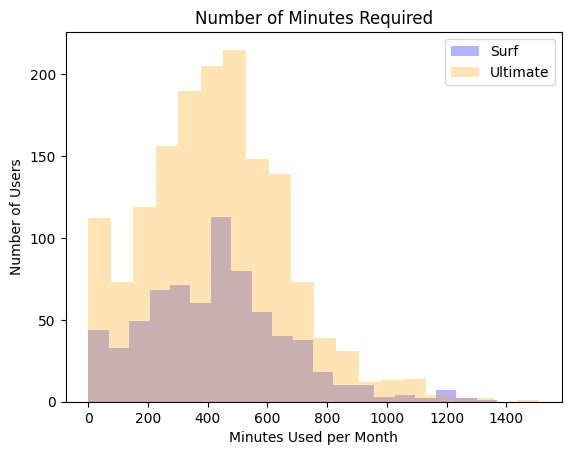

In [52]:
# Split df
ultimate_df = avg_minutes_user[avg_minutes_user['plan'] == 'ultimate']
surf_df = avg_minutes_user[avg_minutes_user['plan'] == 'surf']

# plot histogram
ultimate_df['minutes_per_m'].plot(
    kind='hist',
    bins=20,
    alpha=0.3,
    color='blue',
    title='Number of Minutes Required',
)
surf_df['minutes_per_m'].plot(
     kind='hist',
    bins=20,
    alpha=0.3,
    color='orange',
)
plt.xlabel('Minutes Used per Month')
plt.ylabel('Number of Users')
plt.legend(['Surf', 'Ultimate'])
plt.show()

### Summary
The Surf plan caters primarily to low-to-moderate usage customers, with most users concentrated between 200 and 500 minutes. In contrast, the Ultimate plan attracts a broader range of users with significant usage extending beyond 600 minutes. There is overlap between the two plans in the 200–500 minute range, indicating potential opportunities for better segmentation or plan optimization. Additionally, the data shows that very few customers exceed 1000 minutes, suggesting a niche high-usage demographic. These insights highlight opportunities to tailor marketing efforts, optimize plan features, and target customers for upselling or retention based on their usage patterns.

In [53]:
# Calculate the mean and the variance of the monthly call duration
# Ultimate Mean
mean_ultimate = avg_duration_month_ultimate['ultimate_minutes_per_m'].mean()

# Surf Mean
mean_surf = avg_duration_month_surf['surf_minutes_per_m'].mean()

print('Ultimate Mean:', mean_ultimate.round(0))
print('Surf Mean:', mean_surf.round(0))

Ultimate Mean: 388.0
Surf Mean: 385.0


In [54]:
# Ultimate Variance
variance_ultimate = avg_duration_month_ultimate['ultimate_minutes_per_m'].var()

# Surf Variance
variance_surf = avg_duration_month_surf['surf_minutes_per_m'].var()

print('Ultimate Variance:', variance_ultimate.round(0))
print('Surf Variance:', variance_surf.round(0))

Ultimate Variance: 5967.0
Surf Variance: 5894.0


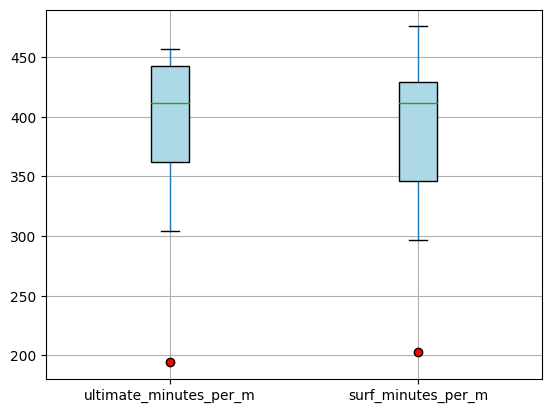

In [55]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Ultimate and surf box plot 
avg_duration_month.boxplot(
    column=['ultimate_minutes_per_m', 'surf_minutes_per_m'],
    patch_artist=True, 
    boxprops=dict(facecolor='lightblue'),
    flierprops=dict(markerfacecolor='red')
)

plt.show()

### Summary:
Both plans show similar median usage values, approximately around 400 minutes, indicating that the average customer usage does not vary significantly between plans. However, the Ultimate plan exhibits a slightly higher upper quartile, suggesting that it attracts users with greater call requirements. Both plans share similar lower and upper bounds for typical usage, but the presence of outliers at the lower end (around 200 minutes) in both plans highlights a subset of customers who may be overpaying for their plan relative to their usage. These insights suggest opportunities for more precise plan recommendations and possible introduction of a low-usage plan to better cater to these outliers.

## Messages

In [56]:
# Compare the number of messages users of each plan tend to send each month
# plan month_year messages_per_m
avg_messages_month = merged_data.groupby(['plan', 'month_year'])['messages_per_m'].mean().round(0).reset_index()
avg_messages_month


,plan,month_year,messages_per_m
0,cancelled,2018-08,15.0
1,cancelled,2018-09,18.0
2,cancelled,2018-10,43.0
3,cancelled,2018-11,21.0
4,cancelled,2018-12,34.0
5,surf,2018-01,10.0
6,surf,2018-02,12.0
7,surf,2018-03,15.0
8,surf,2018-04,17.0
9,surf,2018-05,24.0


In [57]:
# split
avg_messages_surf = avg_messages_month[avg_messages_month['plan'] == 'surf']
avg_messages_surf = avg_messages_surf.rename(columns={'messages_per_m': 'surf_messages_per_m'})
avg_messages_surf

avg_messages_ultimate = avg_messages_month[avg_messages_month['plan'] == 'ultimate']
avg_messages_ultimate = avg_messages_ultimate.rename(columns={'messages_per_m': 'ultimate_messages_per_m'})
avg_messages_ultimate

# merge
avg_messages_month = pd.merge(
    avg_messages_surf[['month_year', 'surf_messages_per_m']],
    avg_messages_ultimate[['month_year', 'ultimate_messages_per_m']],
    on='month_year',
    how='outer'
)

avg_messages_month

,month_year,surf_messages_per_m,ultimate_messages_per_m
0,2018-01,10.0,16.0
1,2018-02,12.0,22.0
2,2018-03,15.0,20.0
3,2018-04,17.0,22.0
4,2018-05,24.0,32.0
5,2018-06,25.0,29.0
6,2018-07,27.0,33.0
7,2018-08,29.0,39.0
8,2018-09,31.0,38.0
9,2018-10,34.0,39.0


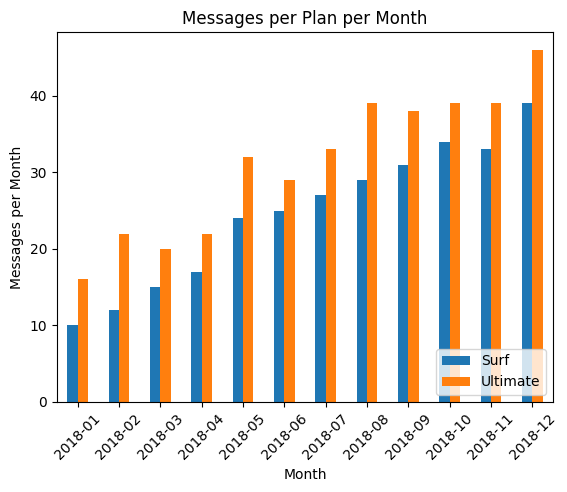

In [58]:
# Plot bar graph
avg_messages_month.plot(
    x='month_year',
    kind='bar',
    title='Messages per Plan per Month',
    xlabel='Month',
    ylabel='Messages per Month'
)

plt.legend(['Surf', 'Ultimate'], loc='lower right')
plt.xticks(rotation=45)
plt.show()

### Summary:
Surf users saw a 128.6% increase in messages per month, while Ultimate users experienced a 161.9% rise, with Ultimate consistently outperforming Surf in message volume. This suggests that Ultimate users are either heavier communicators or benefit from features that encourage more messaging. The growth trajectory, particularly from mid-year onwards, highlights seasonal usage patterns and potential opportunities for targeted promotions or upselling strategies. With messaging activity reaching its peak in December, the company can leverage this data to refine pricing, introduce bundled offers, or enhance customer retention efforts, ensuring continued growth and increased customer satisfaction.

## Internet

In [59]:
# Compare the amount of internet traffic consumed by users per plan
avg_internet_month = merged_data.groupby(['plan', 'month_year'])['gb_used_per_m'].mean().round(0).reset_index()
avg_internet_month

,plan,month_year,gb_used_per_m
0,cancelled,2018-08,19.0
1,cancelled,2018-09,10.0
2,cancelled,2018-10,17.0
3,cancelled,2018-11,15.0
4,cancelled,2018-12,18.0
5,surf,2018-01,5.0
6,surf,2018-02,13.0
7,surf,2018-03,14.0
8,surf,2018-04,12.0
9,surf,2018-05,14.0


In [60]:
# split
avg_internet_ultimate = avg_internet_month[avg_internet_month['plan'] == 'ultimate']
avg_internet_ultimate = avg_internet_ultimate.rename(columns={'gb_used_per_m': 'ultimate_gb_per_m'})
avg_internet_ultimate

avg_internet_surf = avg_internet_month[avg_internet_month['plan'] == 'surf']
avg_internet_surf = avg_internet_surf.rename(columns={'gb_used_per_m': 'surf_gb_per_m'})
avg_internet_surf

# merge
avg_internet_month = pd.merge(
    avg_internet_surf[['month_year', 'surf_gb_per_m']],
    avg_internet_ultimate[['month_year', 'ultimate_gb_per_m']],
    on='month_year',
    how='outer'
)
avg_internet_month

,month_year,surf_gb_per_m,ultimate_gb_per_m
0,2018-01,5.0,7.0
1,2018-02,13.0,18.0
2,2018-03,14.0,19.0
3,2018-04,12.0,16.0
4,2018-05,14.0,17.0
5,2018-06,16.0,16.0
6,2018-07,17.0,17.0
7,2018-08,17.0,18.0
8,2018-09,17.0,18.0
9,2018-10,18.0,18.0


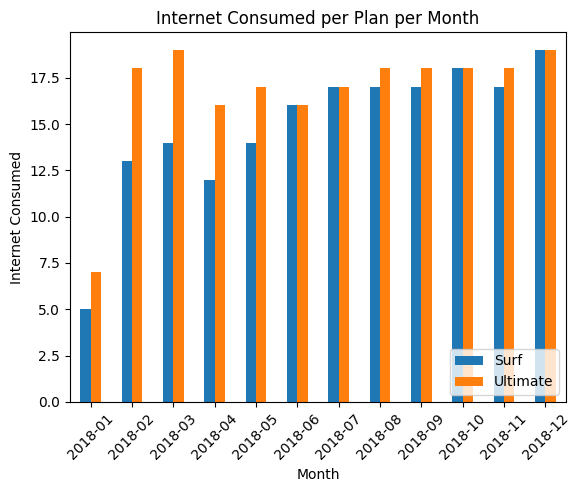

In [61]:
# Plot
avg_internet_month.plot(
    x='month_year',
    kind='bar',
    title='Internet Consumed per Plan per Month',
    xlabel='Month',
    ylabel='Internet Consumed'  
)
plt.legend(['Surf', 'Ultimate'], loc='lower right')
plt.xticks(rotation=45)
plt.show()

### Summary:
Surf users started the year with 5GB per month, growing to 19GB per month in December, while Ultimate users increased from 7GB to 19GB over the same period. The most notable growth occurred in the first quarter, indicating a shift in user behavior or increased reliance on mobile data. By mid-year, usage stabilized, with both plans reaching similar levels. This suggests that data consumption is becoming a primary driver of engagement, presenting opportunities for introducing higher-tier data plans, optimizing pricing strategies, or bundling data-centric services to maximize customer retention and revenue growth.

## Revenue

In [62]:
avg_revenue_month = merged_data.groupby(['plan', 'month_year'])['monthly_revenue'].mean().round(2).reset_index()
avg_revenue_month

,plan,month_year,monthly_revenue
0,cancelled,2018-08,211.39
1,cancelled,2018-09,104.86
2,cancelled,2018-10,187.25
3,cancelled,2018-11,160.52
4,cancelled,2018-12,195.35
5,surf,2018-01,20.00
6,surf,2018-02,37.73
7,surf,2018-03,48.12
8,surf,2018-04,42.11
9,surf,2018-05,50.10


In [63]:
# split
avg_revenue_surf = avg_revenue_month[avg_revenue_month['plan'] == 'surf']
avg_revenue_surf = avg_revenue_surf.rename(columns={'monthly_revenue': 'surf_revenue_per_m'})

avg_revenue_ultimate = avg_revenue_month[avg_revenue_month['plan'] == 'ultimate']
avg_revenue_ultimate = avg_revenue_ultimate.rename(columns={'monthly_revenue': 'ultimate_revenue_per_m'})

# merge
avg_revenue_month = pd.merge(
    avg_revenue_surf[['month_year', 'surf_revenue_per_m']],
    avg_revenue_ultimate[['month_year', 'ultimate_revenue_per_m']],
    on='month_year',
    how='outer'
)

avg_revenue_month

,month_year,surf_revenue_per_m,ultimate_revenue_per_m
0,2018-01,20.00,70.00
1,2018-02,37.73,70.00
2,2018-03,48.12,75.83
3,2018-04,42.11,73.67
4,2018-05,50.10,70.97
5,2018-06,51.34,71.79
6,2018-07,66.23,72.14
7,2018-08,67.14,73.50
8,2018-09,61.11,72.42
9,2018-10,68.32,72.67


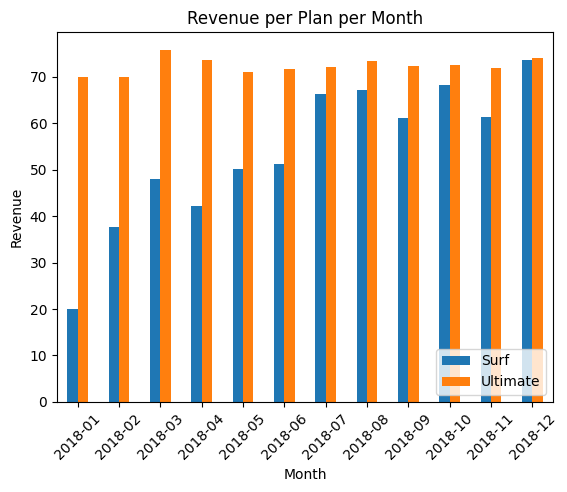

In [64]:
# plot
avg_revenue_month.plot(
    x='month_year',
    kind='bar',
    title='Revenue per Plan per Month',
    xlabel='Month',
    ylabel='Revenue'
)
plt.legend(['Surf', 'Ultimate'], loc='lower right')
plt.xticks(rotation=45)
plt.show()

### Summary:
Surf revenue increased from 20.00 in January to 73.55 in December, reflecting a significant rise in customer spending and potential upselling of additional services. Ultimate revenue remained relatively consistent, starting at 70.00 and ending at 73.98, suggesting a loyal user base with predictable spending patterns. The steady growth in Surf revenue highlights an opportunity to transition high-usage Surf customers to the Ultimate plan for increased long-term value. Additionally, the mid-year surge in Surf revenue aligns with rising data and messaging usage, indicating a strong correlation between engagement and revenue generation. These insights can inform pricing strategies, targeted promotions, and service enhancements to further optimize revenue potential.

In [65]:
# Means per plan
# Ultimate
mean_revenue_ultimate = avg_revenue_month['ultimate_revenue_per_m'].mean()
print('Ultimate Revenue Mean:', mean_revenue_ultimate.round(2))

# Surf
mean_revenue_surf = avg_revenue_month['surf_revenue_per_m'].mean()
print('Surf Revenue Mean:', mean_revenue_surf.round(2))

# Variance per plan
# Ultimate
variance_revenue_ultimate = avg_revenue_month['ultimate_revenue_per_m'].var()
print('Ultimate Revenue Variance:', variance_revenue_ultimate.round(2))

# Surf
variance_revenue_surf = avg_revenue_month['surf_revenue_per_m'].var()
print('Surf Revenue Variance:', variance_revenue_surf.round(2))

Ultimate Revenue Mean: 72.42
Surf Revenue Mean: 53.93
Ultimate Revenue Variance: 2.85
Surf Revenue Variance: 239.43


### Summary:
The Ultimate plan had a higher average monthly revenue of 72.42 with low variance (2.85), indicating a stable and predictable revenue stream from a consistent user base. In contrast, the Surf plan had a lower average revenue of 53.93 but exhibited high variance (239.43), suggesting significant fluctuations in user spending. This variability indicates that Surf users may be more price-sensitive or influenced by seasonal promotions and upselling opportunities. The Ultimate plan’s stability makes it a reliable revenue driver, while the Surf plan’s potential for high revenue growth suggests opportunities for targeted upgrades and retention strategies. Leveraging these insights, the company can focus on maximizing revenue from Surf’s high-spending users while maintaining Ultimate’s strong customer loyalty.

# Test statistical hypotheses

H0: The average monthly revenue of Ultimate and Surf plan users is equal.  
H1: The average monthly revenue of Ultimate and Surf plan users is different.  

In [66]:
# Test the hypotheses

# ultimate revenue
## Extracted individual user revenue per month for ultimate
ultimate_revenue = merged_data.loc[merged_data['plan'] == 'ultimate', 'monthly_revenue']

# surf revenue
## Extracted individual user revenue per month for surf
surf_revenue = merged_data.loc[merged_data['plan'] == 'surf', 'monthly_revenue']

alpha = 0.05

results = st.ttest_ind(ultimate_revenue, surf_revenue)

print('pvalue:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothese.")


pvalue: 2.6283451476588284e-05
We reject the null hypothesis.


In [67]:
# Test the hypotheses
avg_revenue_city = merged_data.groupby(['month_year', 'city'])['monthly_revenue'].mean().round(2).reset_index()
avg_revenue_city

# ny split
avg_revenue_ny = avg_revenue_city[avg_revenue_city['city'] == 'new york-newark-jersey city, ny-nj-pa msa']
avg_revenue_ny = avg_revenue_ny.rename(columns={'monthly_revenue': 'ny_monthly_revenue'})
avg_revenue_ny

,month_year,city,ny_monthly_revenue
15,2018-02,"new york-newark-jersey city, ny-nj-pa msa",45.00
32,2018-03,"new york-newark-jersey city, ny-nj-pa msa",42.81
63,2018-04,"new york-newark-jersey city, ny-nj-pa msa",41.83
101,2018-05,"new york-newark-jersey city, ny-nj-pa msa",50.74
149,2018-06,"new york-newark-jersey city, ny-nj-pa msa",47.54
202,2018-07,"new york-newark-jersey city, ny-nj-pa msa",55.48
263,2018-08,"new york-newark-jersey city, ny-nj-pa msa",62.30
328,2018-09,"new york-newark-jersey city, ny-nj-pa msa",64.03
395,2018-10,"new york-newark-jersey city, ny-nj-pa msa",74.75
464,2018-11,"new york-newark-jersey city, ny-nj-pa msa",74.18


In [68]:
# other split
avg_revenue_other = avg_revenue_city[avg_revenue_city['city'] != 'new york-newark-jersey city, ny-nj-pa msa']
avg_revenue_other['city'] = 'other'
avg_revenue_other = avg_revenue_other.groupby(['month_year', 'city'])['monthly_revenue'].mean().round(2).reset_index()
avg_revenue_other = avg_revenue_other.rename(columns={'monthly_revenue': 'other_monthly_revenue'})
avg_revenue_other

/tmp/ipykernel_141/1771447616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_revenue_other['city'] = 'other'


,month_year,city,other_monthly_revenue
0,2018-01,other,53.33
1,2018-02,other,53.43
2,2018-03,other,64.32
3,2018-04,other,53.32
4,2018-05,other,58.57
5,2018-06,other,64.42
6,2018-07,other,72.46
7,2018-08,other,74.48
8,2018-09,other,69.13
9,2018-10,other,73.02


In [69]:
# merge
avg_revenue_city = pd.merge(
    avg_revenue_ny[['month_year', 'ny_monthly_revenue']],
    avg_revenue_other[['month_year', 'other_monthly_revenue']],
    on='month_year',
    how='outer'
)
avg_revenue_city = avg_revenue_city.fillna(0).reset_index()
first_row = avg_revenue_city[avg_revenue_city['month_year'] == '2018-01']
other_rows = avg_revenue_city[avg_revenue_city['month_year'] != '2018-01']
avg_revenue_city = pd.concat([first_row, other_rows]).reset_index()
avg_revenue_city = avg_revenue_city[['month_year', 'ny_monthly_revenue', 'other_monthly_revenue']]
avg_revenue_city

,month_year,ny_monthly_revenue,other_monthly_revenue
0,2018-01,0.00,53.33
1,2018-02,45.00,53.43
2,2018-03,42.81,64.32
3,2018-04,41.83,53.32
4,2018-05,50.74,58.57
5,2018-06,47.54,64.42
6,2018-07,55.48,72.46
7,2018-08,62.30,74.48
8,2018-09,64.03,69.13
9,2018-10,74.75,73.02


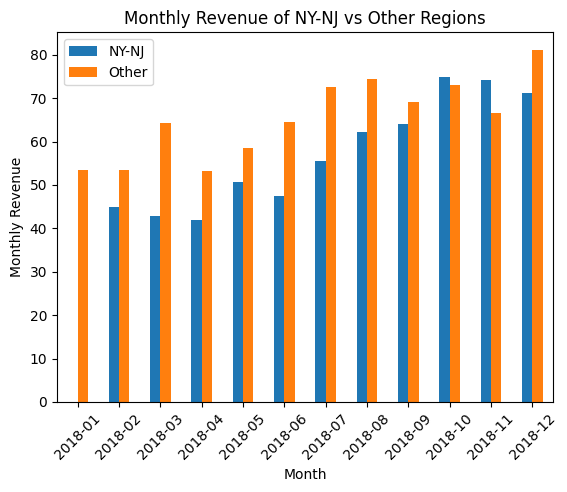

In [70]:
# quick plot
avg_revenue_city.plot(
    x='month_year',
    kind='bar',
    title='Monthly Revenue of NY-NJ vs Other Regions',
    xlabel='Month',
    ylabel='Monthly Revenue'
)
plt.xticks(rotation=45)
plt.legend(['NY-NJ', 'Other'])
plt.show()

### Summary:
The revenue data for 2018 indicates a significant upward trend in both NY-NJ monthly revenue and other monthly revenue over the course of the year. Starting with 0.00 in January for NY-NJ monthly revenue, the figures quickly rose and stabilized, peaking at 74.75 in October before slightly declining to 71.07 in December. The other monthly revenue followed a similar growth trajectory, starting at 53.33 in January and gradually increasing to 81.11 by December. These figures suggest a strong growth pattern. The overall stability in revenue growth presents an opportunity for strategic focus on retaining customers and exploring upselling opportunities in both revenue streams. It could also be beneficial to investigate factors contributing to the slight fluctuations, particularly in NY-NJ monthly revenue, to optimize future growth.

In [71]:
# Test the hypotheses
#Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

## Extract individual user revenue per month for NY-NJ
ny_revenue = merged_data.loc[merged_data['city'].str.contains('ny|nj', regex=True), 'monthly_revenue']

## Extract individual user revenue per month for other
other_revenue = merged_data.loc[~merged_data['city'].str.contains('ny|nj', regex=True), 'monthly_revenue']

alpha = 0.05

results = st.ttest_ind(ny_revenue, other_revenue)

print('pvalue: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis: The average revenue from users in the NY-NJ area is different from that of the users from the other regions.')
else:
    print("We can't reject the null hypothese: The average revenue from users in the NY-NJ area is different from that of the users from the other regions.")


pvalue:  0.6723946050548641
We can't reject the null hypothese: The average revenue from users in the NY-NJ area is different from that of the users from the other regions.


# Conclusion

The analysis of the Surf and Ultimate plans highlights key differences in usage patterns, customer behavior, and revenue trends. Surf experienced significant growth in data and messaging usage, but with considerable monthly fluctuations, while Ultimate showed more consistent usage and revenue, indicating a stable customer base. The comparison of revenue between the NY-NJ region and other regions revealed no significant difference, as the p-value was 0.672, suggesting regional strategies may not need major adjustments.

Surf predominantly caters to low-to-moderate usage customers, with most users in the 200-500 minute range, while Ultimate appeals to a broader customer base, with some exceeding 600 minutes. This overlap suggests opportunities for better segmentation or introducing a low-usage plan. Surf’s higher revenue variance indicates greater fluctuations in spending, while Ultimate’s low variance points to more predictable revenue. The statistical test confirmed a significant difference in revenue between the two plans, with a p-value of 2.63.

Focusing on seasonality for Surf through targeted promotions and consistency for Ultimate with customer loyalty programs could improve retention and revenue. Transitioning high-usage Surf customers to the Ultimate plan could also drive long-term value. Additionally, both plans' growing reliance on data usage presents an opportunity for data-centric plans or bundles. The general conclusion suggests refining segmentation, optimizing plan features, and targeting specific customer behaviors to maximize growth and retention.